In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter as gauss
# from scipy.integrate import trapezoid as trapz
# from pyspec import spectrum as spec
from matplotlib.colors import LogNorm
import warnings
import scipy.integrate as integ
warnings.filterwarnings("ignore")

In [2]:
import numpy_groupies

In [3]:
x=np.linspace(0,2*np.pi,1000)
y=np.linspace(0,2*np.pi,1000)
z=np.sin(x)**2 + np.sin(y)**2
z,zz=np.meshgrid(z,z)
field=zz**2 + z**2

In [4]:
xd=np.linspace(0,100,1000)
yd=np.linspace(0,100,1000)

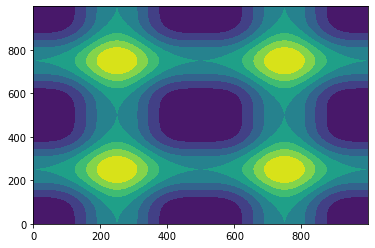

In [5]:
plt.contourf(zz**2 + z**2)

In [6]:
da=xr.DataArray(data=field,dims=('x','y'))

In [7]:
da

<xarray.DataArray (x: 1000, y: 1000)>
array([[0.00000000e+00, 6.25901596e-09, 1.00136333e-07, ...,
        1.00136333e-07, 6.25901596e-09, 1.43953882e-62],
       [6.25901596e-09, 1.25180319e-08, 1.06395349e-07, ...,
        1.06395349e-07, 1.25180319e-08, 6.25901596e-09],
       [1.00136333e-07, 1.06395349e-07, 2.00272665e-07, ...,
        2.00272665e-07, 1.06395349e-07, 1.00136333e-07],
       ...,
       [1.00136333e-07, 1.06395349e-07, 2.00272665e-07, ...,
        2.00272665e-07, 1.06395349e-07, 1.00136333e-07],
       [6.25901596e-09, 1.25180319e-08, 1.06395349e-07, ...,
        1.06395349e-07, 1.25180319e-08, 6.25901596e-09],
       [1.43953882e-62, 6.25901596e-09, 1.00136333e-07, ...,
        1.00136333e-07, 6.25901596e-09, 2.87907764e-62]])
Dimensions without coordinates: x, y

In [8]:
da=da.assign_coords(xd=('x',xd),yd=('y',yd))

In [9]:
spec=xrft.isotropic_powerspectrum(da.drop(['xd','yd']))

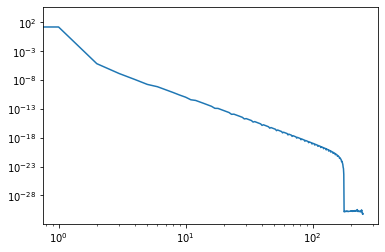

In [10]:
plt.plot(spec)
plt.xscale('log')
plt.yscale('log')




In [11]:
spec=xrft.isotropic_crossspectrum(da.drop(['xd','yd']),da.drop(['xd','yd']))